In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('titanic.txt')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.duplicated().sum()

0

In [4]:
data = data.drop_duplicates()
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [6]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
def sex_binary(x):
    if x == 'male':
        return 1
    else:
        return 0

In [8]:
'''data['Sex'] = data['Sex'].map(sex_binary)'''

"data['Sex'] = data['Sex'].map(sex_binary)"

In [9]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
ohe = OneHotEncoder()
one_hot_embarked = ohe.fit_transform(np.array(data['Embarked']).reshape(-1,1))
one_hot_embarked

<712x3 sparse matrix of type '<class 'numpy.float64'>'
	with 712 stored elements in Compressed Sparse Row format>

In [11]:
one_hot_embarked.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [12]:
ohe.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.base import BaseEstimator, TransformerMixin

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis = 1),
                                                    data['Survived'],
                                                    test_size = 0.3,
                                                    stratify = data['Survived'],
                                                    random_state = 42)

In [15]:
cat_columns = X_train.select_dtypes(include = 'object').columns.to_list()
num_columns = X_train.select_dtypes(exclude = 'object').columns.to_list()

In [16]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
408,3,male,21.0,0,0,7.7750,S
647,1,male,56.0,0,0,35.5000,C
311,1,female,18.0,2,2,262.3750,C
543,2,male,32.0,1,0,26.0000,S
236,2,male,44.0,1,0,26.0000,S
...,...,...,...,...,...,...,...
735,3,male,28.5,0,0,16.1000,S
728,2,male,25.0,1,0,26.0000,S
381,3,female,1.0,0,2,15.7417,C
645,1,male,48.0,1,0,76.7292,C


In [18]:
class SexBinarizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        future_sex_column = [sex_binary(i) for i in X['Sex']]
        X['Sex'] = future_sex_column
        return X

In [19]:
transformers = [
    ('sex_column', SexBinarizer(), ['Sex']),
    ('embarked_column', OneHotEncoder(), ['Embarked']),
    ('num_columns', StandardScaler(), num_columns)
]
transformer = ColumnTransformer(transformers = transformers)
transformer

ColumnTransformer(transformers=[('sex_column', SexBinarizer(), ['Sex']),
                                ('embarked_column', OneHotEncoder(),
                                 ['Embarked']),
                                ('num_columns', StandardScaler(),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])])

In [20]:
new = transformer.fit_transform(X_train)
new

array([[ 1.        ,  0.        ,  0.        , ..., -0.54502861,
        -0.49485015, -0.53430548],
       [ 1.        ,  1.        ,  0.        , ..., -0.54502861,
        -0.49485015,  0.06344725],
       [ 0.        ,  1.        ,  0.        , ...,  1.6797603 ,
         1.90939742,  4.95488644],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.54502861,
         1.90939742, -0.36254293],
       [ 1.        ,  1.        ,  0.        , ...,  0.56736584,
        -0.49485015,  0.95235138],
       [ 1.        ,  0.        ,  0.        , ..., -0.54502861,
        -0.49485015, -0.52837647]])

In [21]:
frame_features =\
pd.DataFrame(new, columns = ['Sex', 'C_emb','Q_emb', 'S_emb', 'Pclass', 'Age', 'SibSp', 'Parch','Fare'])
frame_features.head()

,Sex,C_emb,Q_emb,S_emb,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,0.0,1.0,0.930236,-0.602897,-0.545029,-0.494850,-0.534305
1,1.0,1.0,0.0,0.0,-1.451551,1.762103,-0.545029,-0.494850,0.063447
2,0.0,1.0,0.0,0.0,-1.451551,-0.805612,1.679760,1.909397,4.954886
3,1.0,0.0,0.0,1.0,-0.260657,0.140389,0.567366,-0.494850,-0.141373
4,1.0,0.0,0.0,1.0,-0.260657,0.951246,0.567366,-0.494850,-0.141373


In [22]:
ml_pipeline = Pipeline([
    ('transform_columns', transformer),
    ('log_reg', LogisticRegression())
])

ml_pipeline

Pipeline(steps=[('transform_columns',
                 ColumnTransformer(transformers=[('sex_column', SexBinarizer(),
                                                  ['Sex']),
                                                 ('embarked_column',
                                                  OneHotEncoder(),
                                                  ['Embarked']),
                                                 ('num_columns',
                                                  StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare'])])),
                ('log_reg', LogisticRegression())])

In [23]:
ml_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform_columns',
                 ColumnTransformer(transformers=[('sex_column', SexBinarizer(),
                                                  ['Sex']),
                                                 ('embarked_column',
                                                  OneHotEncoder(),
                                                  ['Embarked']),
                                                 ('num_columns',
                                                  StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare'])])),
                ('log_reg', LogisticRegression())])

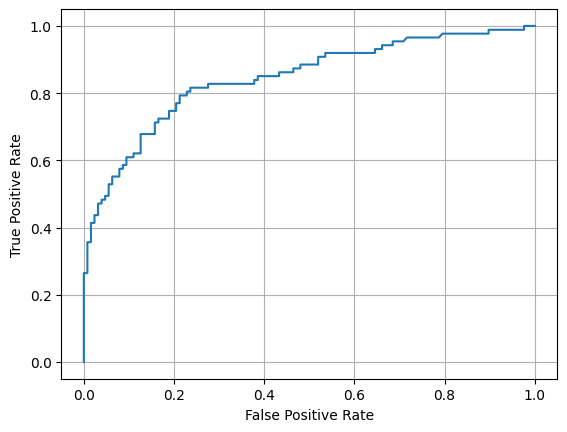

In [24]:
from sklearn.metrics import roc_curve   # на выходе: fpr (доля ложноположительных классификаций), tpr (доля истинно положительных классификаций) и пороги
from sklearn.metrics import RocCurveDisplay

fpr, tpr, porogi =\
roc_data =\
roc_curve(y_true = y_test,
          y_score = ml_pipeline.predict_proba(X_test)[:,1])


display = RocCurveDisplay(fpr = roc_data[0],
                          tpr = roc_data[1])
display.plot() 
plt.grid()

In [25]:
roc =\
pd.DataFrame({'fpr': fpr,
              'tpr': tpr,
              'porogi': porogi})

roc[(roc['tpr']>=0.70) & (roc['tpr'] <= 0.85)]

,fpr,tpr,porogi
32,0.157480,0.712644,0.538035
33,0.165354,0.712644,0.532085
34,0.165354,0.724138,0.510713
35,0.188976,0.724138,0.494168
36,0.188976,0.747126,0.484191
37,0.204724,0.747126,0.457168
38,0.204724,0.770115,0.452269
39,0.212598,0.770115,0.447263
40,0.212598,0.793103,0.430840
41,0.228346,0.793103,0.426190


При смене порога на больший - уменьшится tpr и fpr, но предсказания будут надежнее

In [27]:
roc.sort_values(by = 'porogi')

,fpr,tpr,porogi
77,1.000000,1.000000,0.027929
76,0.976378,1.000000,0.053712
75,0.976378,0.988506,0.053806
74,0.897638,0.988506,0.070706
73,0.897638,0.977011,0.072180
...,...,...,...
4,0.007874,0.356322,0.787456
3,0.007874,0.264368,0.838030
2,0.000000,0.264368,0.862731
1,0.000000,0.011494,0.971443
